In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import poisson

k = 0: prob = 0.7710515858035663
k = 1: prob = 0.20047341230892726
k = 2: prob = 0.02606154360016055
k = 3: prob = 0.0022586671120139136
k = 4: prob = 0.00014681336228090453
k = 5: prob = 7.634294838607034e-06
k = 6: prob = 3.308194430063047e-07
k = 7: prob = 1.2287579311662736e-08


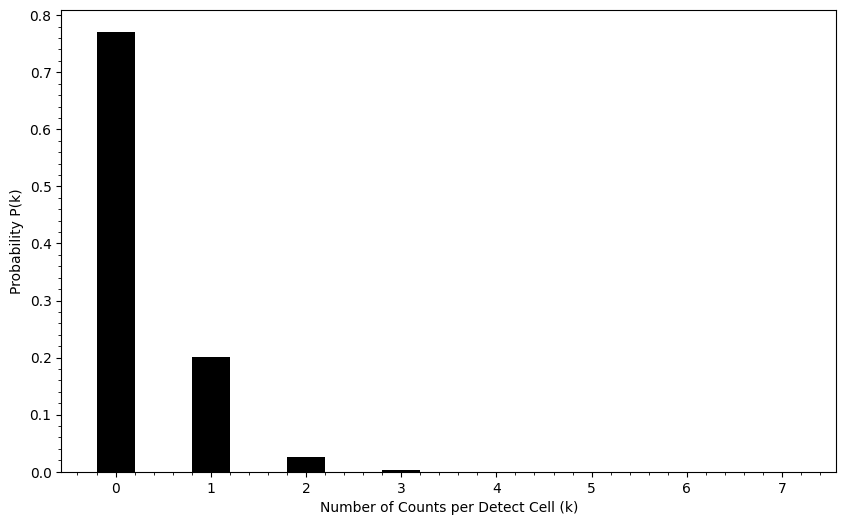

In [2]:
# Parameters
lambda_ = 0.260
k_values = np.arange(0, 8)  # k = 0 to 7

# Calculate Poisson PMF and CDF
pmf_values = poisson.pmf(k_values, lambda_)

# Plot PMF and CDF
plt.figure(figsize=(10, 6))
plt.bar(k_values , pmf_values, width=0.4, label='PMF (P(k))', color='k')
plt.xlabel("Number of Counts per Detect Cell (k)")
plt.ylabel( "Probability P(k)")
plt.minorticks_on()
plt.savefig("poisson.png", dpi=300, bbox_inches='tight')
for p, k_val in zip(pmf_values, k_values):
    print(f'k = {k_val}: prob = {p}')



P_λ(≥ 3) = 0.00241345828734596
P_λ(≥ 4) = 0.00015479117533201414
P_λ(≥ 5) = 7.977813051174287e-06
P_λ(≥ 6) = 3.4351821254219317e-07


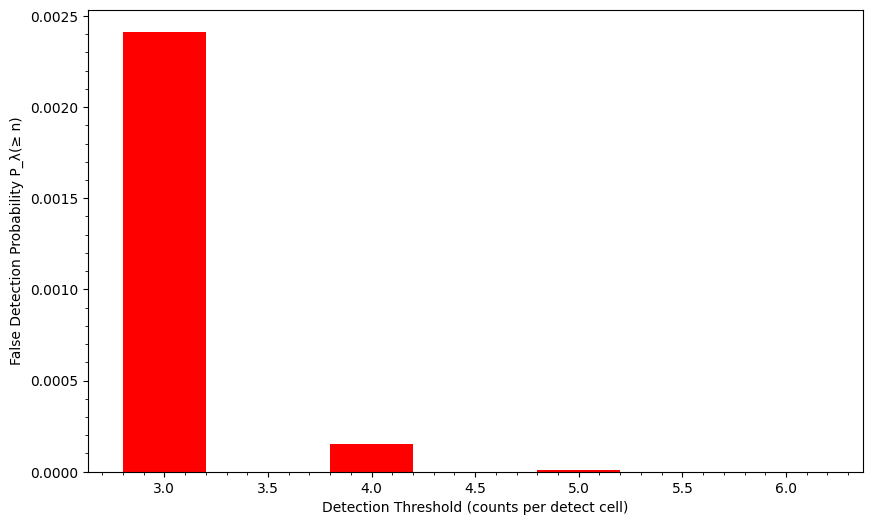

In [3]:
n_val = np.arange(3,7)
prob_6 = []
for n in n_val:
    cdf_val = poisson.cdf(n-1, lambda_) #cdf is summation of pmf
    prob = 1 - cdf_val
    prob_6.append(prob)
for n, p in zip(n_val, prob_6):
    print(f"P_λ(≥ {n}) = {p}")
plt.figure(figsize=(10, 6))
plt.bar(n_val, prob_6, width=0.4, label='P_λ(≥ n)', color='red')
plt.xlabel( "Detection Threshold (counts per detect cell)")
plt.ylabel("False Detection Probability P_λ(≥ n)")
plt.minorticks_on()
plt.savefig("poisson2.png", dpi=300, bbox_inches='tight')


In [4]:
fov_arcmin = 17
cell_size_arcsec = 3

fov_arcsec = fov_arcmin * 60  
num_cells_per_side = int(fov_arcsec / cell_size_arcsec)  
total_detect_cells = num_cells_per_side ** 2  
print(f"FOV: {fov_arcmin} arcmin × {fov_arcmin} arcmin = {fov_arcsec} arcsec × {fov_arcsec} arcsec")
print(f"Detect cell size: {cell_size_arcsec} arcsec × {cell_size_arcsec} arcsec")
print(f"Number of cells per side: {num_cells_per_side}")
print(f"Total number of detect cells: {total_detect_cells:,}")

FOV: 17 arcmin × 17 arcmin = 1020 arcsec × 1020 arcsec
Detect cell size: 3 arcsec × 3 arcsec
Number of cells per side: 340
Total number of detect cells: 115,600


In [5]:
# Function to find detection threshold for roughly one false detection
def find_detection_threshold(N, lambda_):
    """Find smallest n such that N * P(X >= n) ≈ 1"""
    target_prob = 1.0 / N
    print(f"\nTarget probability per cell: {target_prob:.2e}")
    
    
    for n in range(1, 15):  # Start from k=1, check up to k=14
        p_false = 1 - poisson.cdf(n-1, lambda_)
        expected_false = N * p_false
        print(f"n = {n}: P(≥{n}) = {p_false:.2e}, Expected false detections = {expected_false:.3f}")
        
        if p_false <= target_prob:
            return n, p_false, expected_false
    
    return None, None, None

# Calculate detection threshold
print(f"\n{'='*60}")
print("ACTION 7: Finding Detection Threshold")
print(f"{'='*60}")

threshold, prob_per_cell, expected_false = find_detection_threshold(total_detect_cells, lambda_)

print(f"\n{'='*60}")
print(f'The probability corresponding to expected false detection {(expected_false).min():.2f} is {prob_per_cell.min():.2e}, and the number of counts in each detect cell is {5}')


ACTION 7: Finding Detection Threshold

Target probability per cell: 8.65e-06
n = 1: P(≥1) = 2.29e-01, Expected false detections = 26466.437
n = 2: P(≥2) = 2.85e-02, Expected false detections = 3291.710
n = 3: P(≥3) = 2.41e-03, Expected false detections = 278.996
n = 4: P(≥4) = 1.55e-04, Expected false detections = 17.894
n = 5: P(≥5) = 7.98e-06, Expected false detections = 0.922

The probability corresponding to expected false detection 0.92 is 7.98e-06, and the number of counts in each detect cell is 5


In [14]:
 np.log(2.34e-7)

-15.26794472158871